In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df_raw.shape

(48895, 16)

In [16]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [10]:
# Duplicates

print(f"The number of duplicated Name records is: {df_raw['name'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {df_raw['host_id'].duplicated().sum()}")
print(f"The number of duplicated ID records is: {df_raw['id'].duplicated().sum()}")

The number of duplicated Name records is: 989
The number of duplicated Host ID records is: 11438
The number of duplicated ID records is: 0


In [11]:
# Drop irrelevant features

df_raw.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
df_raw.sample(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
27641,158219768,Brooklyn,Bedford-Stuyvesant,40.68476,-73.92961,Entire home/apt,100,2,73,1,140
4644,6726808,Manhattan,Upper West Side,40.80131,-73.96750,Private room,69,5,2,1,0
22291,95286194,Manhattan,Chelsea,40.75030,-74.00473,Private room,57,1,53,1,33
673,1332108,Manhattan,Harlem,40.81512,-73.94692,Private room,81,2,72,1,0
25264,445894,Brooklyn,Bath Beach,40.60106,-74.00933,Entire home/apt,95,2,2,2,0
45667,105634248,Manhattan,Upper West Side,40.79355,-73.96752,Entire home/apt,200,31,0,3,333
8824,27103894,Brooklyn,Williamsburg,40.70965,-73.94411,Private room,115,1,0,1,0
39866,10994664,Brooklyn,Bushwick,40.69050,-73.90622,Private room,55,30,0,8,340
30175,136455880,Bronx,Fordham,40.86918,-73.89050,Private room,34,1,2,2,5
1503,3462232,Manhattan,Lower East Side,40.71950,-73.99416,Private room,167,5,32,1,341


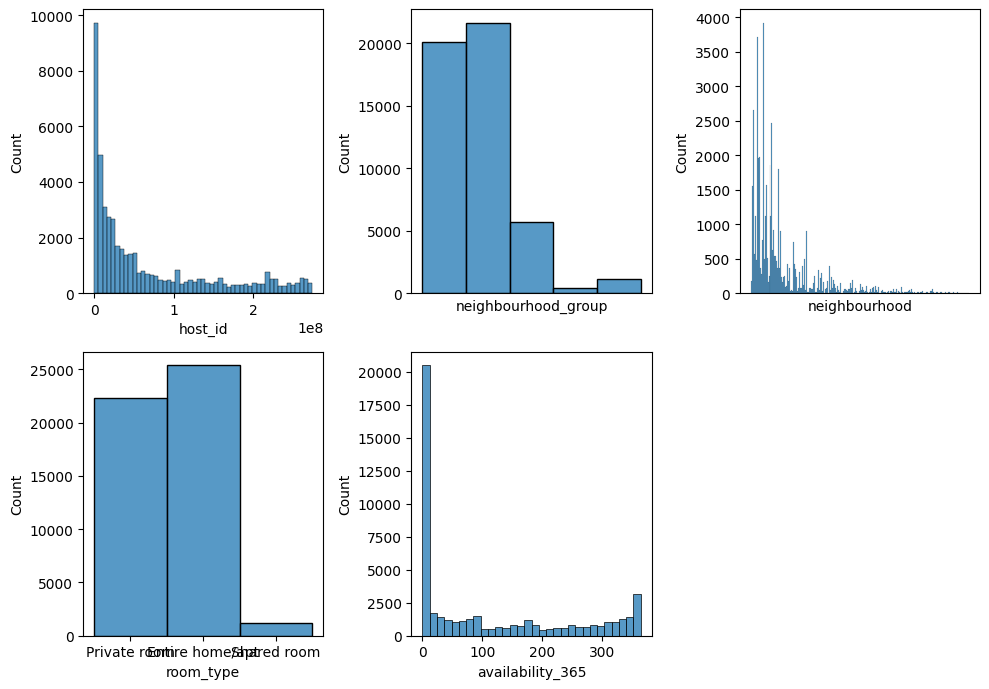

In [12]:
# Visualization

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = df_raw, x = "host_id")
sns.histplot(ax = axis[0,1], data = df_raw, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = df_raw, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = df_raw, x = "room_type")
sns.histplot(ax = axis[1,1], data = df_raw, x = "availability_365")
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

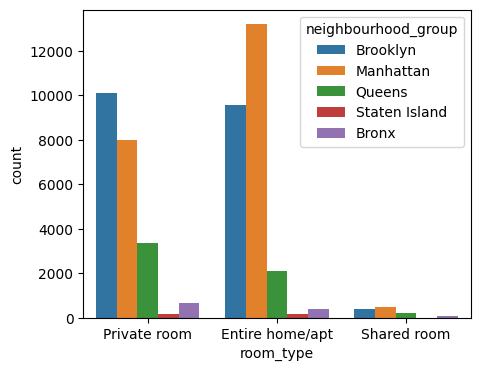

In [14]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = df_raw, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

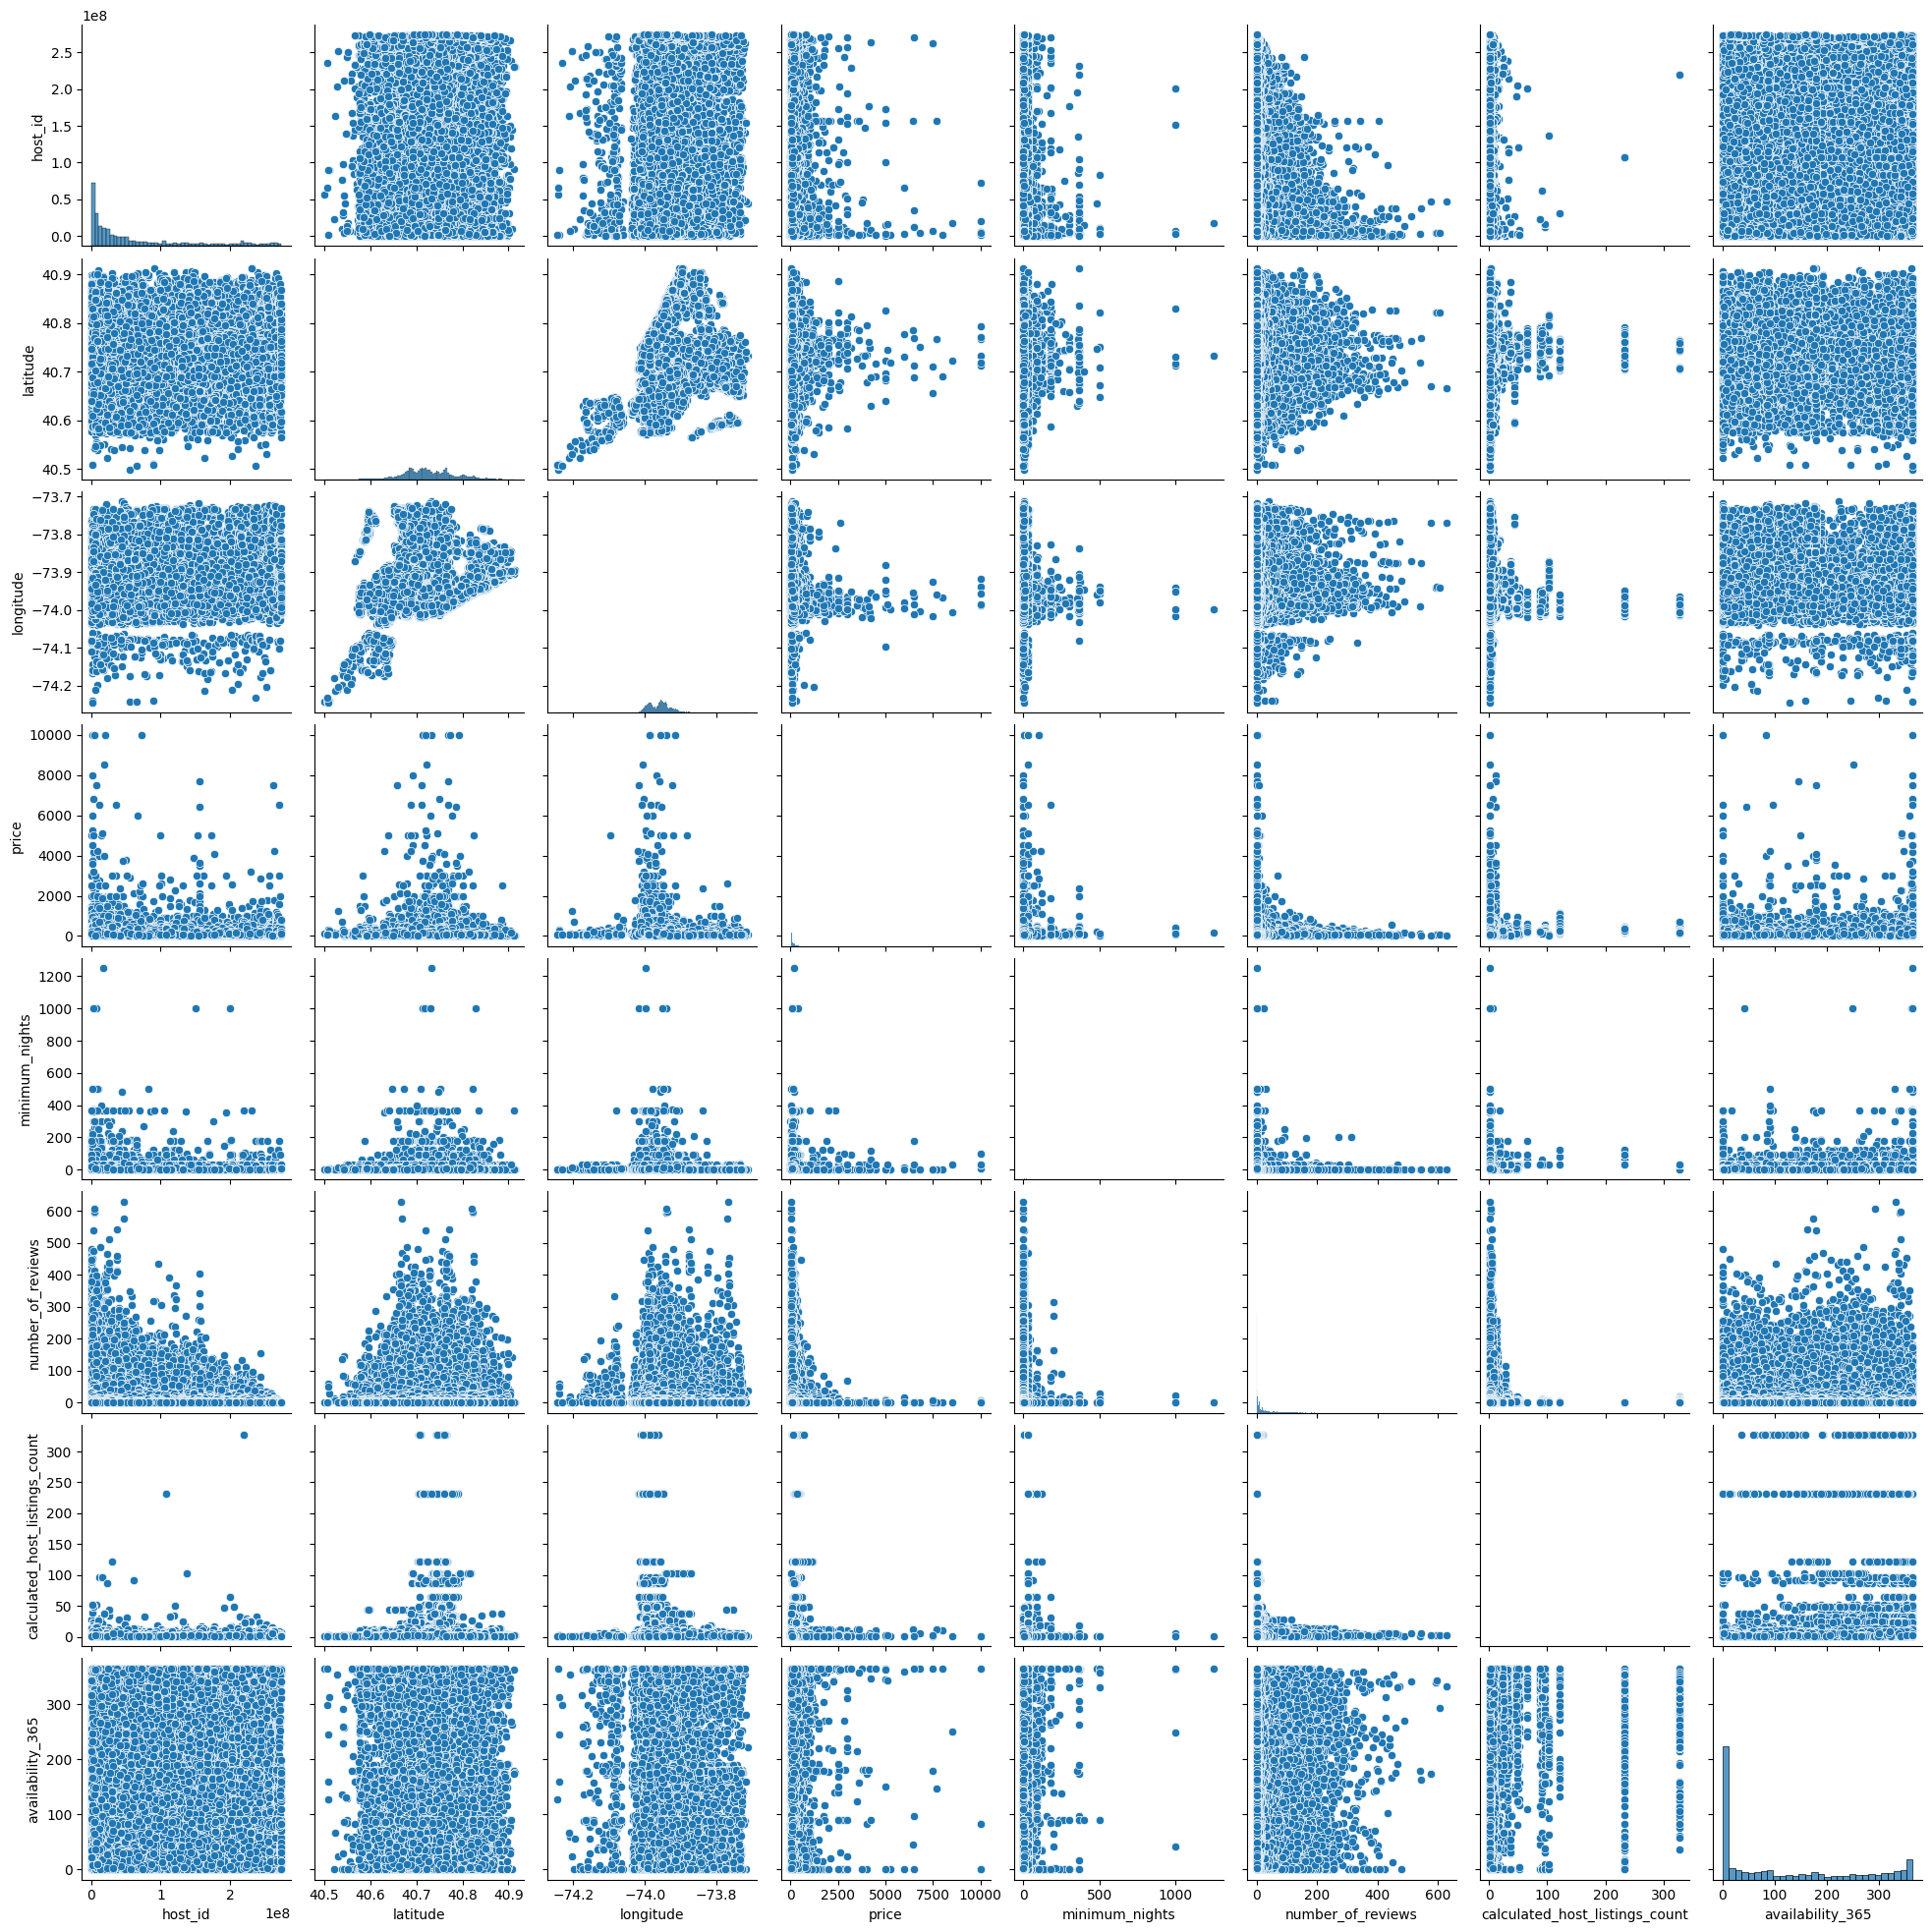

In [15]:
# Pairplots

sns.pairplot(data = df_raw)

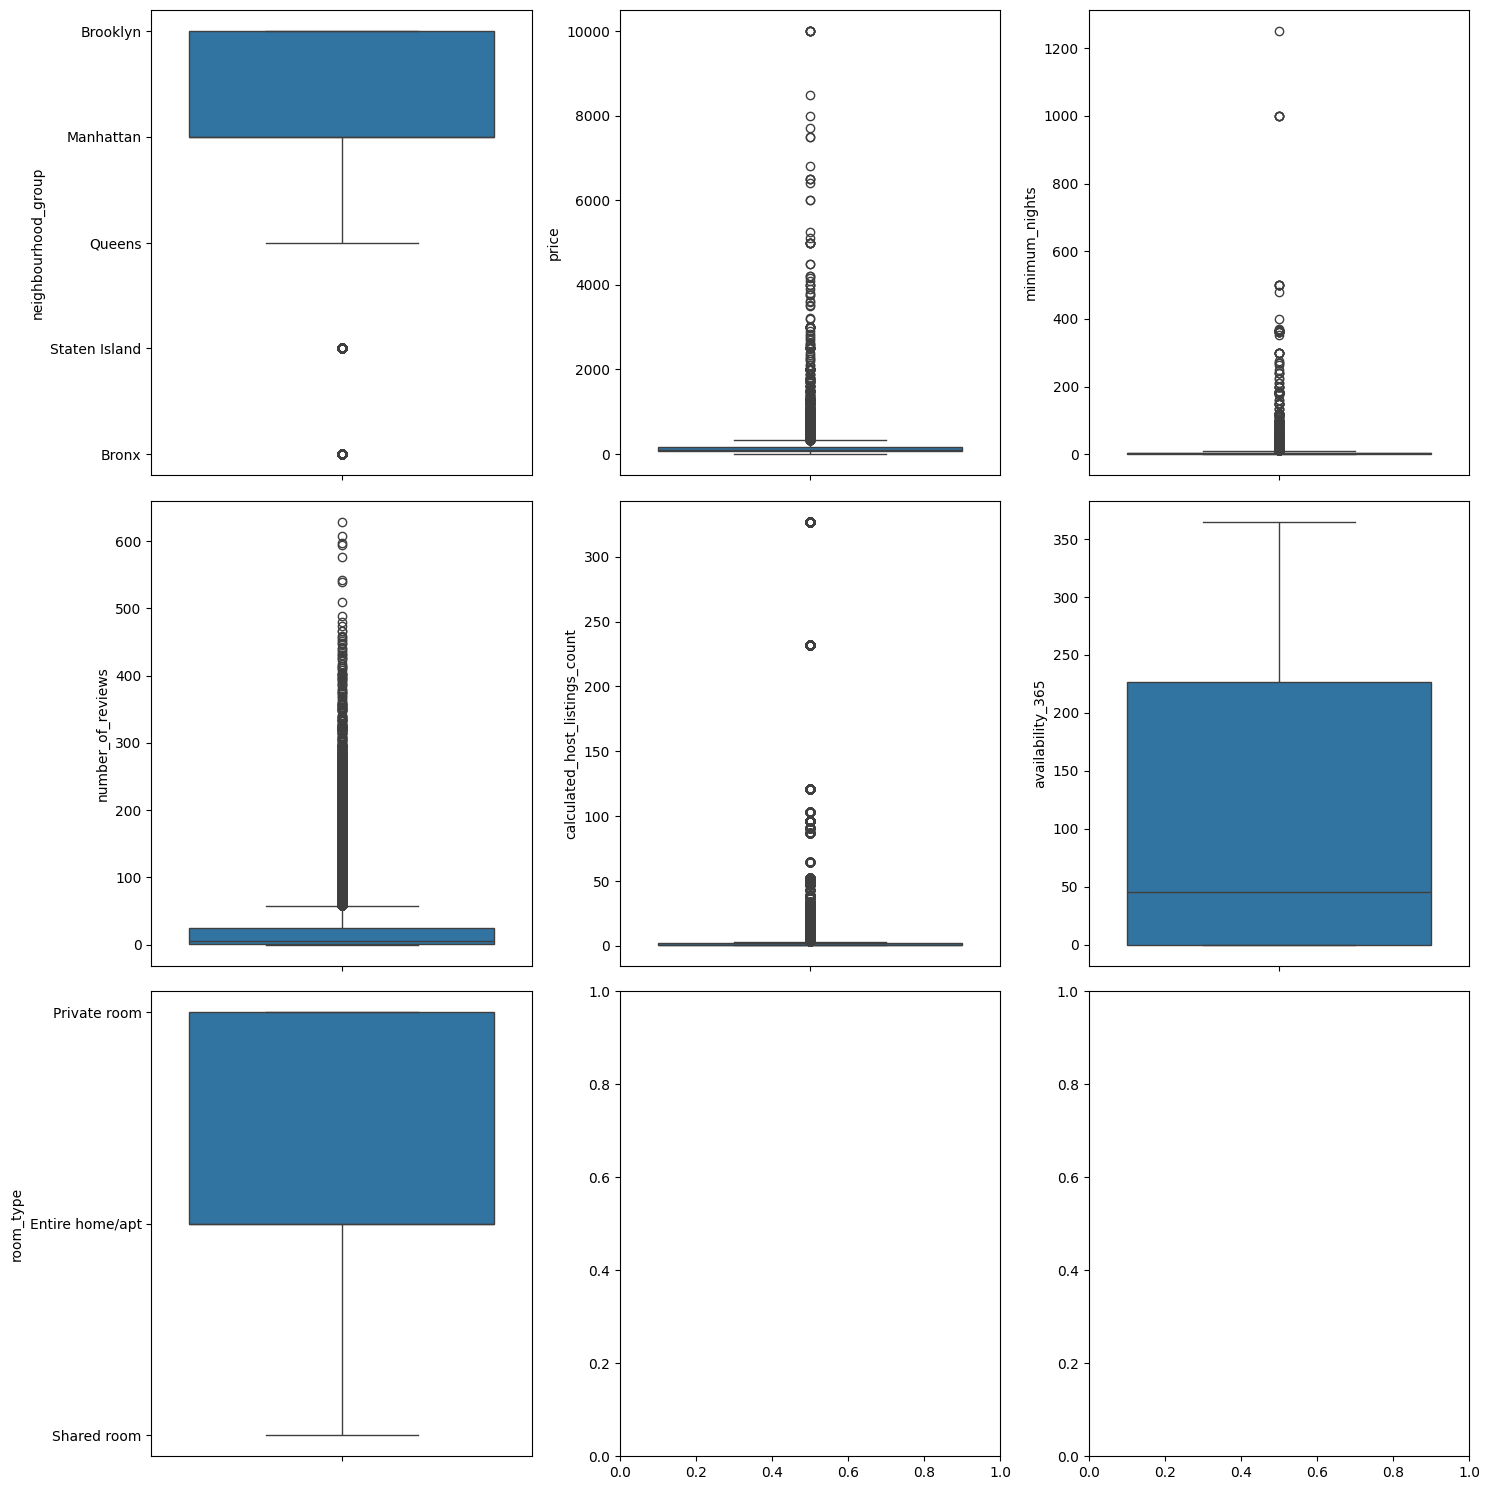

In [17]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df_raw, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = df_raw, y = "price")
sns.boxplot(ax = axes[0, 2], data = df_raw, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = df_raw, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = df_raw, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = df_raw, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = df_raw, y = "room_type")

plt.tight_layout()

plt.show()